# Further Exploration of Deep Neural Networks

100 hidden layers was a dud, 70 showed promise, so here we go

## Setup

In [1]:
# Packages
import pandas as pd
import torch
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
import math

In [2]:
# Import data
tor_df = pd.read_csv("/home/jeremy/github_tornadoesr/data/raw/tor_train_set_no_zeros_mob_home.csv")


# Quick inspection
tor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8230 entries, 0 to 8229
Data columns (total 33 columns):
DAMAGE_PROPERTY       8230 non-null float64
DURATION_SECONDS      8230 non-null float64
BEGIN_LAT             8230 non-null float64
BEGIN_LON             8230 non-null float64
TOR_LENGTH            8230 non-null float64
TOR_WIDTH             8230 non-null float64
YEAR                  8230 non-null float64
OPEN_WATER_PROP       8230 non-null float64
DEV_OPEN_PROP         8230 non-null float64
DEV_LOW_PROP          8230 non-null float64
DEV_MED_PROP          8230 non-null float64
DEV_HIGH_PROP         8230 non-null float64
DECID_FOREST_PROP     8230 non-null float64
EVERGR_FOREST_PROP    8230 non-null float64
MIXED_FOREST_PROP     8230 non-null float64
SHRUB_SCRUB_PROP      8230 non-null float64
GRASS_LAND_PROP       8230 non-null float64
PASTURE_HAY_PROP      8230 non-null float64
CULT_CROPS_PROP       8230 non-null float64
WOOD_WETLAND_PROP     8230 non-null float64
HERB_WETLAND_

In [3]:
# Seperating variables
# The dependent variables
tornado_outcomes = tor_df.iloc[:, [0]]


# Quick inspection
tornado_outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8230 entries, 0 to 8229
Data columns (total 1 columns):
DAMAGE_PROPERTY    8230 non-null float64
dtypes: float64(1)
memory usage: 64.4 KB


In [4]:
# The independent variables
tornado_features = tor_df.iloc[:, 1:]


# Quick inspection
tornado_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8230 entries, 0 to 8229
Data columns (total 32 columns):
DURATION_SECONDS      8230 non-null float64
BEGIN_LAT             8230 non-null float64
BEGIN_LON             8230 non-null float64
TOR_LENGTH            8230 non-null float64
TOR_WIDTH             8230 non-null float64
YEAR                  8230 non-null float64
OPEN_WATER_PROP       8230 non-null float64
DEV_OPEN_PROP         8230 non-null float64
DEV_LOW_PROP          8230 non-null float64
DEV_MED_PROP          8230 non-null float64
DEV_HIGH_PROP         8230 non-null float64
DECID_FOREST_PROP     8230 non-null float64
EVERGR_FOREST_PROP    8230 non-null float64
MIXED_FOREST_PROP     8230 non-null float64
SHRUB_SCRUB_PROP      8230 non-null float64
GRASS_LAND_PROP       8230 non-null float64
PASTURE_HAY_PROP      8230 non-null float64
CULT_CROPS_PROP       8230 non-null float64
WOOD_WETLAND_PROP     8230 non-null float64
HERB_WETLAND_PROP     8230 non-null float64
BARREN_LAND_P

In [5]:
# Make the dependent variables into a numpy array
outcomes_array = tornado_outcomes.values


# Makes the numpy array into a torch Tensor
outcomes_Tensor = torch.from_numpy(outcomes_array)


# Quick inspection
outcomes_Tensor


 0.7085
 0.5805
 0.7085
   ⋮    
 0.9397
 0.9644
 0.7085
[torch.DoubleTensor of size 8230x1]

In [6]:
# Make the independent variables into a numpy array
features_array = tornado_features.values


# Make the numpy array into a torch Tensor
features_Tensor = torch.from_numpy(features_array)


# Quick inspection
features_Tensor


-3.0188e-01 -3.7157e-01  6.1740e-01  ...   8.5283e-01 -8.7299e-01  3.0227e-01
 6.8209e-01 -9.3529e-01  1.1152e+00  ...   8.4258e-01  1.5787e+00 -5.1904e-02
-2.2607e+00  1.8028e-01  8.2261e-01  ...   2.1240e-01 -6.2229e-01 -1.8228e+00
                ...                   ⋱                   ...                
 4.5872e-01 -1.9908e+00  1.1802e+00  ...   1.7873e+00  1.2653e+00  6.5645e-01
 6.8209e-01  3.0892e-01  5.3075e-01  ...   1.0947e+00 -9.6516e-01 -5.1904e-02
-2.2607e+00 -1.4187e+00 -8.0176e-02  ...   3.8968e-01 -1.3154e+00 -4.0608e-01
[torch.DoubleTensor of size 8230x32]

### Convert DoubleTensor to FloatTensor

In [7]:
# Changing dependent variables from a DoubleTensor to a FloatTensor
outcomes_Tensor = outcomes_Tensor.float()


# ...and for the independent variables
features_Tensor = features_Tensor.float()


# Quick check
features_Tensor


-3.0188e-01 -3.7157e-01  6.1740e-01  ...   8.5283e-01 -8.7299e-01  3.0227e-01
 6.8209e-01 -9.3529e-01  1.1152e+00  ...   8.4258e-01  1.5787e+00 -5.1904e-02
-2.2607e+00  1.8028e-01  8.2261e-01  ...   2.1240e-01 -6.2229e-01 -1.8228e+00
                ...                   ⋱                   ...                
 4.5872e-01 -1.9908e+00  1.1802e+00  ...   1.7873e+00  1.2653e+00  6.5645e-01
 6.8209e-01  3.0892e-01  5.3075e-01  ...   1.0947e+00 -9.6516e-01 -5.1904e-02
-2.2607e+00 -1.4187e+00 -8.0176e-02  ...   3.8968e-01 -1.3154e+00 -4.0608e-01
[torch.FloatTensor of size 8230x32]

## 1: Seventy Hidden Layers

In [8]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [9]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(32, 32),    # Hidden Layer (HL) 1
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 2
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 3
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 4
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 5
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 6
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 7
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 8
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 9
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 10
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 11
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 12
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 13
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 14
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 15
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 16
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 17
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 18
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 19
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 20
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 21
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 22
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 23
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 24
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 25
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 26
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 27
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 28
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 29
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 30
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 31
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 32
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 33
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 34
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 35
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 36
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 37
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 38
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 39
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 40
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 41
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 42
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 43
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 44
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 45
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 46
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 47
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 48
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 49
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 50
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 51
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 52
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 53
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 54
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 55
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 56
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 57
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 58
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 59
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 60
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 61
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 62
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 63
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 64
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 65
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 66
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 67
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 68
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 69
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 70
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 1))

In [10]:
# Set the loss function
loss_fn = torch.nn.MSELoss(size_average=False)

In [11]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 2e-3


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(15000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

In [12]:
# Get the iterations
iterations = list(range(0, 15000))

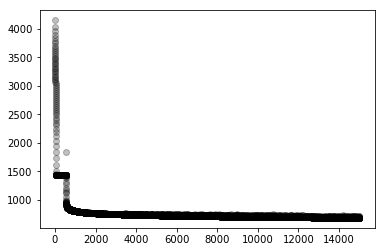

In [13]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors, c = "black", alpha = 0.25)

In [14]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8230)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

In [15]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
outcomes_Variable_resized = outcomes_Variable.resize(8230)


# Make the FloatTensor into a numpy.array
outcomes_array = outcomes_Variable_resized.data.numpy()


# Make the numpy.array into a list
outcomes_list = outcomes_array.tolist()

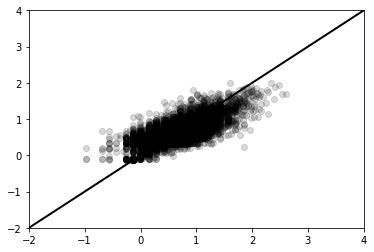

In [16]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Validation Set Performance

In [17]:
# Import data
valid_df = pd.read_csv("/home/jeremy/github_tornadoesr/data/raw/tor_cv_set_no_zeros_mob_home.csv")


# Validation set outcomes
valid_outcomes = valid_df.iloc[:, [0]]


# Make the validation outcomes into a numpy array
valid_outcomes_array = valid_outcomes.values


# Makes the numpy array into a torch Tensor
valid_outcomes_Tensor = torch.from_numpy(valid_outcomes_array)


# Changing validation outcomes from a DoubleTensor to a FloatTensor
valid_outcomes_Tensor = valid_outcomes_Tensor.float()


# Make the Tensor into a Pytorch Variable
valid_outcomes_Variable = Variable(valid_outcomes_Tensor)

In [18]:
# Validation set predictors
valid_predictors = valid_df.iloc[:, 1:]


# Make the validation predictors into a numpy array
valid_predictors_array = valid_predictors.values


# Makes the numpy array into a torch Tensor
valid_predictors_Tensor = torch.from_numpy(valid_predictors_array)


# Changing validation predictors from a DoubleTensor to a FloatTensor
valid_predictors_Tensor = valid_predictors_Tensor.float()


# Make the Tensor into a Pytorch Variable
valid_predictors_Variable = Variable(valid_predictors_Tensor)

In [19]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 290.6895
[torch.FloatTensor of size 1]

In [20]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2748)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

In [21]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
valid_outcomes_Variable_resized = valid_outcomes_Variable.resize(2748)


# Make the FloatTensor into a numpy.array
valid_outcomes_array = valid_outcomes_Variable_resized.data.numpy()


# Make the numpy.array into a list
valid_outcomes_list = valid_outcomes_array.tolist()

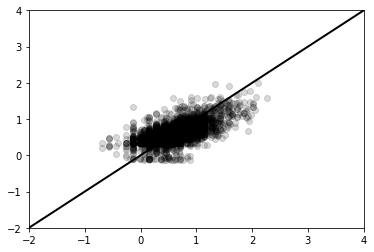

In [22]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Test Set Performance

In [23]:
# Import data
test_df = pd.read_csv("/home/jeremy/github_tornadoesr/data/raw/tor_test_set_no_zeros_mob_home.csv")


# Validation set outcomes
test_outcomes = test_df.iloc[:, [0]]


# Make the validation outcomes into a numpy array
test_outcomes_array = test_outcomes.values


# Makes the numpy array into a torch Tensor
test_outcomes_Tensor = torch.from_numpy(test_outcomes_array)


# Changing validation outcomes from a DoubleTensor to a FloatTensor
test_outcomes_Tensor = test_outcomes_Tensor.float()


# Make the Tensor into a Pytorch Variable
test_outcomes_Variable = Variable(test_outcomes_Tensor)

In [24]:
# Validation set predictors
test_predictors = test_df.iloc[:, 1:]


# Make the validation predictors into a numpy array
test_predictors_array = test_predictors.values


# Makes the numpy array into a torch Tensor
test_predictors_Tensor = torch.from_numpy(test_predictors_array)


# Changing validation predictors from a DoubleTensor to a FloatTensor
test_predictors_Tensor = test_predictors_Tensor.float()


# Make the Tensor into a Pytorch Variable
test_predictors_Variable = Variable(test_predictors_Tensor)

In [25]:
# Get the validation set predictions
y_test_pred = model(test_predictors_Variable)


# Print the loss
loss_fn(y_test_pred,
        test_outcomes_Variable)

Variable containing:
 278.1369
[torch.FloatTensor of size 1]

In [26]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_test_pred_resized = y_test_pred.resize(2699)


# Make the FloatTensor into a numpy.array
y_test_pred_array = y_test_pred_resized.data.numpy()


# Convert back to native units and scale
y_test_pred_array = y_test_pred_array*5.41747 + 7.67485


# Make the numpy.array into a list
y_test_pred_list = y_test_pred_array.tolist()

In [27]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
test_outcomes_Variable_resized = test_outcomes_Variable.resize(2699)


# Make the FloatTensor into a numpy.array
test_outcomes_array = test_outcomes_Variable_resized.data.numpy()


# Convert back to native units and scale
test_outcomes_array = test_outcomes_array*5.41747 + 7.67485


# Make the numpy.array into a list
test_outcomes_list = test_outcomes_array.tolist()

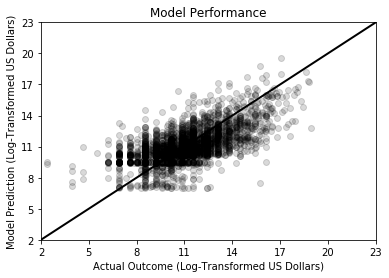

In [28]:
# Plot new predictions versus new data outcomes
plt.scatter(test_outcomes_list, y_test_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([2, 23])

axes.set_ylim([2, 23])

axes.set_xticks([2, 5, 8, 11, 14, 17, 20, 23])

axes.set_yticks([2, 5, 8, 11, 14, 17, 20, 23])

plt.plot([2, 23], [2, 23], 'k-', lw=2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

## 2: Seventy Hidden Layers

In [29]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [30]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(32, 32),    # Hidden Layer (HL) 1
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 2
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 3
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 4
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 5
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 6
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 7
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 8
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 9
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 10
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 11
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 12
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 13
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 14
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 15
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 16
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 17
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 18
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 19
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 20
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 21
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 22
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 23
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 24
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 25
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 26
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 27
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 28
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 29
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 30
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 31
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 32
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 33
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 34
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 35
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 36
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 37
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 38
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 39
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 40
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 41
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 42
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 43
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 44
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 45
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 46
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 47
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 48
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 49
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 50
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 51
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 52
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 53
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 54
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 55
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 56
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 57
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 58
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 59
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 60
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 61
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 62
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 63
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 64
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 65
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 66
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 67
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 68
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 69
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 70
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 1))

In [31]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 2e-3


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(15000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

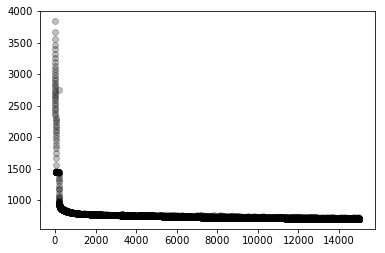

In [32]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors, c = "black", alpha = 0.25)

In [33]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8230)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

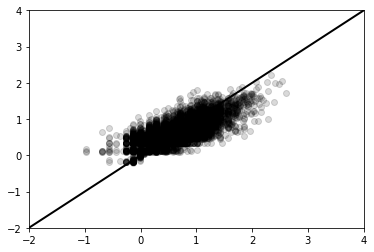

In [34]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Validation Set Performance

In [35]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 289.2086
[torch.FloatTensor of size 1]

In [36]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2748)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

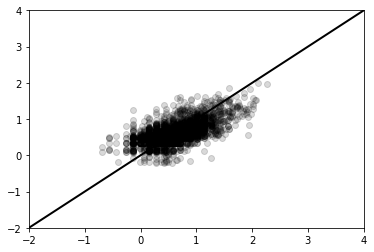

In [37]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Test Set Perfomance

In [38]:
# Get the validation set predictions
y_test_pred = model(test_predictors_Variable)


# Print the loss
loss_fn(y_test_pred,
        test_outcomes_Variable)

Variable containing:
 274.4383
[torch.FloatTensor of size 1]

In [39]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_test_pred_resized = y_test_pred.resize(2699)


# Make the FloatTensor into a numpy.array
y_test_pred_array = y_test_pred_resized.data.numpy()


# Convert back to native units and scale
y_test_pred_array = y_test_pred_array*5.41747 + 7.67485


# Make the numpy.array into a list
y_test_pred_list = y_test_pred_array.tolist()

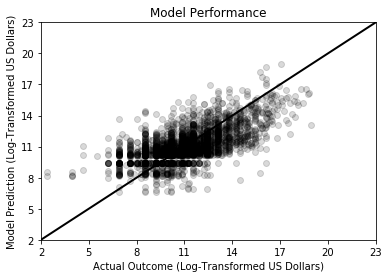

In [40]:
# Plot new predictions versus new data outcomes
plt.scatter(test_outcomes_list, y_test_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([2, 23])

axes.set_ylim([2, 23])

axes.set_xticks([2, 5, 8, 11, 14, 17, 20, 23])

axes.set_yticks([2, 5, 8, 11, 14, 17, 20, 23])

plt.plot([2, 23], [2, 23], 'k-', lw=2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

## 3: One Hundred Hidden Layers

In [41]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [42]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(32, 32),    # Hidden Layer (HL) 1
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 2
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 3
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 4
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 5
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 6
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 7
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 8
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 9
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 10
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 11
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 12
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 13
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 14
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 15
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 16
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 17
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 18
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 19
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 20
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 21
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 22
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 23
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 24
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 25
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 26
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 27
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 28
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 29
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 30
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 31
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 32
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 33
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 34
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 35
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 36
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 37
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 38
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 39
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 40
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 41
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 42
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 43
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 44
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 45
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 46
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 47
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 48
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 49
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 50
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 51
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 52
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 53
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 54
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 55
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 56
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 57
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 58
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 59
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 60
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 61
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 62
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 63
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 64
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 65
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 66
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 67
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 68
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 69
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 70
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 71
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 72
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 73
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 74
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 75
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 76
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 77
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 78
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 79
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 80
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 81
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 82
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 83
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 84
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 85
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 86
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 87
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 88
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 89
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 90
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 91
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 92
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 93
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 94
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 95
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 96
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 97
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 98
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 99
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 100
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 1))

In [43]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 2e-3


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(15000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

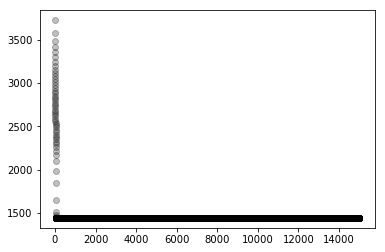

In [44]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors, c = "black", alpha = 0.25)

In [45]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8230)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

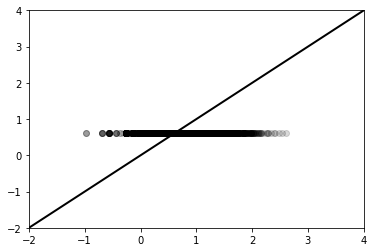

In [46]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Validation Set Performance

In [47]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 475.4232
[torch.FloatTensor of size 1]

In [48]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2748)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

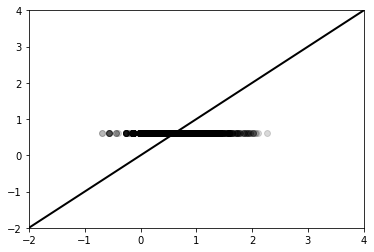

In [49]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Test Set Performance

In [50]:
# Get the validation set predictions
y_test_pred = model(test_predictors_Variable)


# Print the loss
loss_fn(y_test_pred,
        test_outcomes_Variable)

Variable containing:
 464.4694
[torch.FloatTensor of size 1]

In [51]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_test_pred_resized = y_test_pred.resize(2699)


# Make the FloatTensor into a numpy.array
y_test_pred_array = y_test_pred_resized.data.numpy()


# Convert back to native units and scale
y_test_pred_array = y_test_pred_array*5.41747 + 7.67485


# Make the numpy.array into a list
y_test_pred_list = y_test_pred_array.tolist()

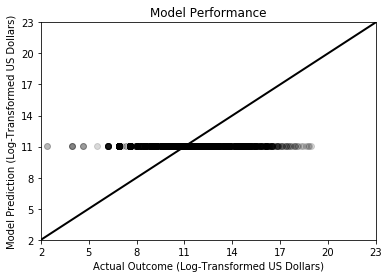

In [52]:
# Plot new predictions versus new data outcomes
plt.scatter(test_outcomes_list, y_test_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([2, 23])

axes.set_ylim([2, 23])

axes.set_xticks([2, 5, 8, 11, 14, 17, 20, 23])

axes.set_yticks([2, 5, 8, 11, 14, 17, 20, 23])

plt.plot([2, 23], [2, 23], 'k-', lw=2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

## 4: One Hundred Hidden Layers

In [53]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [54]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(32, 32),    # Hidden Layer (HL) 1
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 2
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 3
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 4
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 5
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 6
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 7
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 8
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 9
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 10
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 11
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 12
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 13
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 14
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 15
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 16
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 17
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 18
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 19
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 20
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 21
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 22
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 23
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 24
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 25
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 26
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 27
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 28
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 29
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 30
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 31
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 32
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 33
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 34
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 35
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 36
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 37
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 38
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 39
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 40
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 41
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 42
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 43
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 44
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 45
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 46
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 47
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 48
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 49
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 50
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 51
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 52
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 53
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 54
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 55
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 56
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 57
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 58
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 59
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 60
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 61
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 62
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 63
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 64
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 65
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 66
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 67
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 68
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 69
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 70
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 71
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 72
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 73
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 74
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 75
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 76
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 77
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 78
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 79
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 80
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 81
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 82
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 83
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 84
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 85
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 86
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 87
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 88
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 89
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 90
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 91
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 92
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 93
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 94
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 95
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 96
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 97
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 98
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 99
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 32),    # HL 100
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 1))

In [55]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 2e-3


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(15000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

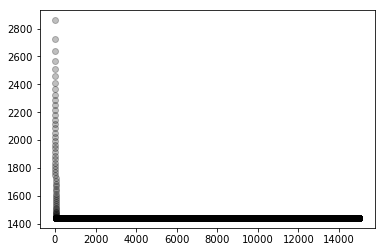

In [56]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors, c = "black", alpha = 0.25)

In [57]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8230)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

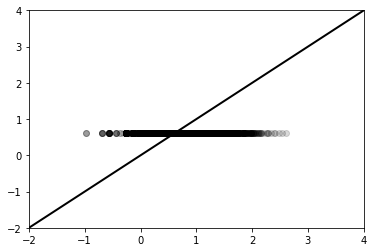

In [58]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Validation Set Performance

In [59]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 475.4232
[torch.FloatTensor of size 1]

In [60]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2748)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

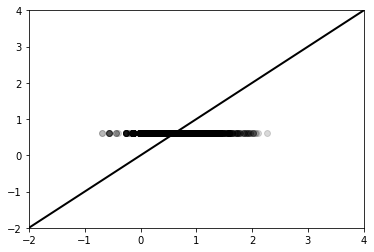

In [61]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Test Set Performance

In [62]:
# Get the validation set predictions
y_test_pred = model(test_predictors_Variable)


# Print the loss
loss_fn(y_test_pred,
        test_outcomes_Variable)

Variable containing:
 464.4693
[torch.FloatTensor of size 1]

In [63]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_test_pred_resized = y_test_pred.resize(2699)


# Make the FloatTensor into a numpy.array
y_test_pred_array = y_test_pred_resized.data.numpy()


# Convert back to native units and scale
y_test_pred_array = y_test_pred_array*5.41747 + 7.67485


# Make the numpy.array into a list
y_test_pred_list = y_test_pred_array.tolist()

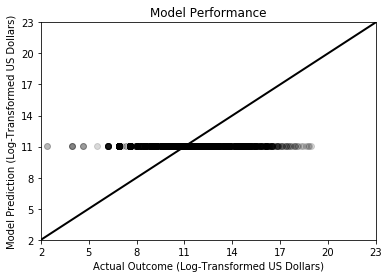

In [64]:
# Plot new predictions versus new data outcomes
plt.scatter(test_outcomes_list, y_test_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([2, 23])

axes.set_ylim([2, 23])

axes.set_xticks([2, 5, 8, 11, 14, 17, 20, 23])

axes.set_yticks([2, 5, 8, 11, 14, 17, 20, 23])

plt.plot([2, 23], [2, 23], 'k-', lw=2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")